In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('dados_modelos/house_prices.csv')

X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train_model = X_train.select_dtypes(include=np.number).dropna(axis='columns')

X_test_model = X_test[X_train_model.columns]

In [21]:
correlacoes_ordenadas = pd.concat([X_train_model, y_train], axis=1).corr()['SalePrice'].abs().sort_values(ascending=False)
correlacoes_ordenadas

SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
Fireplaces       0.457549
BsmtFinSF1       0.359460
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
EnclosedPorch    0.149532
KitchenAbvGr     0.142785
ScreenPorch      0.119172
PoolArea         0.115630
MSSubClass       0.088081
OverallCond      0.074391
3SsnPorch        0.051532
BsmtHalfBath     0.048346
MoSold           0.041890
MiscVal          0.020179
LowQualFinSF     0.011189
YrSold           0.009099
BsmtFinSF2       0.005731
Name: SalePrice, dtype: float64

In [23]:
features_ordenadas = correlacoes_ordenadas.index[1:]
features_ordenadas

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea',
       'MSSubClass', 'OverallCond', '3SsnPorch', 'BsmtHalfBath', 'MoSold',
       'MiscVal', 'LowQualFinSF', 'YrSold', 'BsmtFinSF2'],
      dtype='object')

In [25]:
def treino_avaliacao_test(X_train, y_train, X_test, y_test):
    estimador = LinearRegression()
    estimador.fit(X_train, y_train)

    # aqui deveriamos ter um cross validation
    y_pred_train = estimador.predict(X_train)
    erro_train = mean_absolute_error(y_train, y_pred_train)
    
    y_pred_test = estimador.predict(X_test)
    erro_test = mean_absolute_error(y_test, y_pred_test)
    
    r2 = r2_score(y_test, y_pred_test)
    
    return erro_train, erro_test, r2

In [26]:
qtde_features = len(features_ordenadas)
qtde_features

33

In [33]:
# estimador.fit(???????)
X_train_model[features_ordenadas[:2]]

,OverallQual,GrLivArea
254,5,1314
1066,6,1571
638,5,796
799,5,1768
380,5,1691
...,...,...
1095,6,1314
1130,4,1981
1294,5,864
860,7,1426


In [34]:
resultados_treinos = []

for i in range(1, qtde_features+1):
    resultados_treinos.append(
        treino_avaliacao_test(
            X_train_model[features_ordenadas[:i]],
            y_train,
            X_test_model[features_ordenadas[:i]],
            y_test
        )
    )

df_resultados_treinos = pd.DataFrame(resultados_treinos, columns=['erro_train', 'erro_test', 'r2'])

In [35]:
df_resultados_treinos.head()

,erro_train,erro_test,r2
0,33628.123707,33343.242087,0.650468
1,28595.641353,28555.249976,0.745764
2,27161.035279,28121.524152,0.758581
3,26726.101027,27542.043018,0.762493
4,24992.037680,25284.809689,0.791618


<AxesSubplot: >

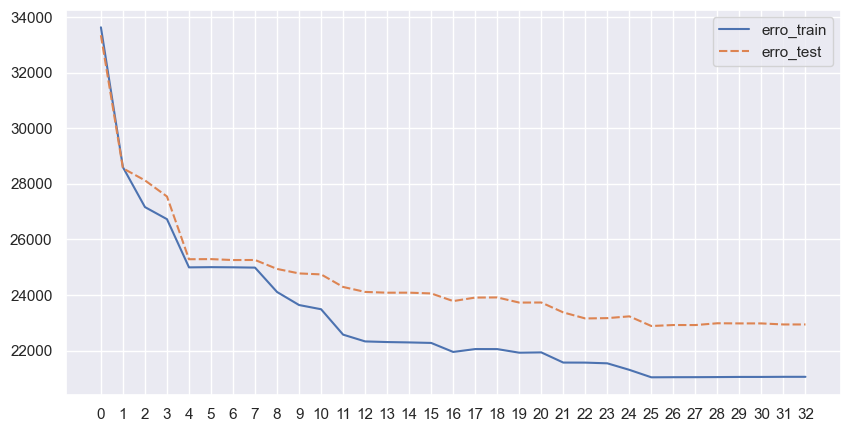

In [40]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
sns.lineplot(data=df_resultados_treinos[['erro_train', 'erro_test']])

<AxesSubplot: >

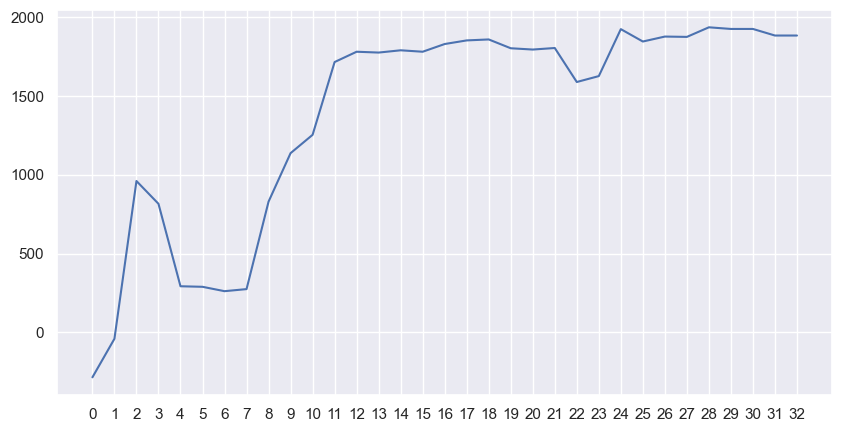

In [41]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
sns.lineplot(data=df_resultados_treinos['erro_test'] - df_resultados_treinos['erro_train'])

<AxesSubplot: >

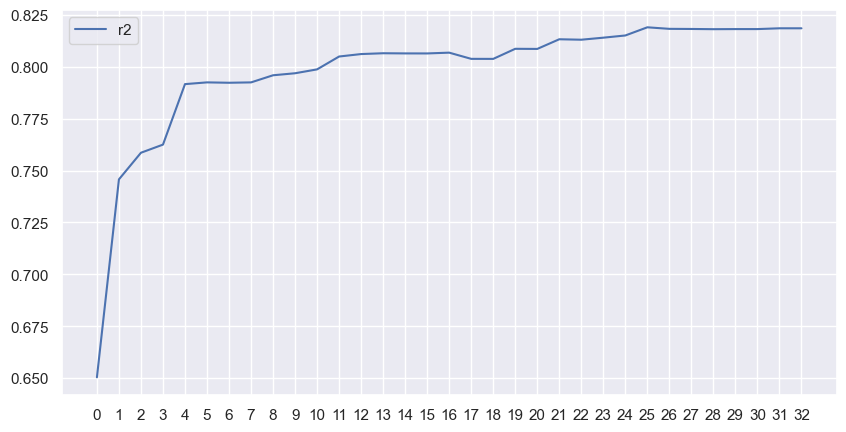

In [42]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
sns.lineplot(data=df_resultados_treinos[['r2']])

In [43]:
def treino_avaliacao_test(X_train, y_train, X_test, y_test):
    estimador = LinearRegression()
    estimador.fit(X_train, y_train)

    # aqui deveriamos ter um cross validation
    y_pred_train = estimador.predict(X_train)
    erro_train = mean_absolute_error(y_train, y_pred_train)
    
    y_pred_test = estimador.predict(X_test)
    erro_test = mean_absolute_error(y_test, y_pred_test)
    
    r2 = r2_score(y_test, y_pred_test)
    r2_ajustado = 1 - (1-r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    return erro_train, erro_test, r2, r2_ajustado

In [44]:
resultados_treinos = []

for i in range(1, qtde_features+1):
    resultados_treinos.append(
        treino_avaliacao_test(
            X_train_model[features_ordenadas[:i]],
            y_train,
            X_test_model[features_ordenadas[:i]],
            y_test
        )
    )

df_resultados_treinos = pd.DataFrame(resultados_treinos, columns=['erro_train', 'erro_test', 'r2', 'r2a'])

In [45]:
df_resultados_treinos.head()

,erro_train,erro_test,r2,r2a
0,33628.123707,33343.242087,0.650468,0.649262
1,28595.641353,28555.249976,0.745764,0.744005
2,27161.035279,28121.524152,0.758581,0.756066
3,26726.101027,27542.043018,0.762493,0.759183
4,24992.037680,25284.809689,0.791618,0.787975


<AxesSubplot: >

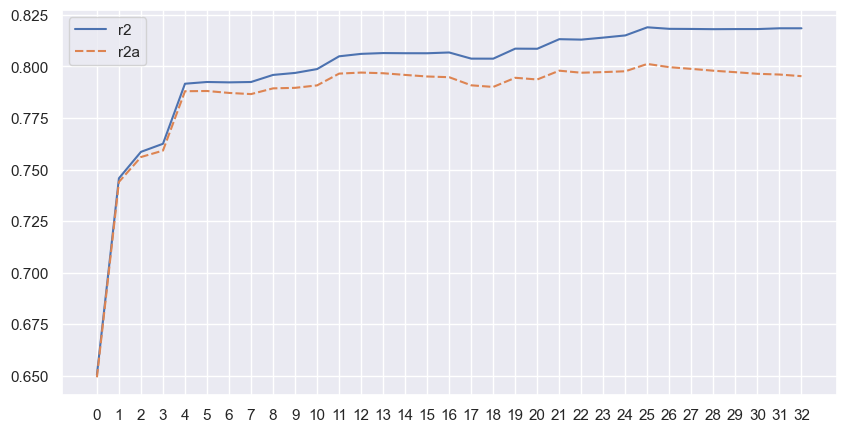

In [46]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
sns.lineplot(data=df_resultados_treinos[['r2', 'r2a']])